***Intelligent Crop Recommendation System***


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt,ceil
from sklearn.metrics import f1_score , confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('https://gist.githubusercontent.com/gunalabs/68a5daeb5af151558a8701194dd68189/raw/4bd62b61cb36da0bc1c000a039c1547a45cd062a/cropsdata.csv')


## DataSet Understanding

describe() calls the method, and returns the result.

In [82]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


info() prints a concise summary of a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [84]:
#prints length of an dataset.
len(df)

2200

head() prints the First 5 rows in dataset.

In [85]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


head(x) prints the given number of starting rows in dataset.
here, x = 10. 

In [86]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


tail() prints the last 5 rows in dataset.

In [87]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


tail(x) prints the given number of ending rows in dataset.
here, x = 10. 

In [88]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [89]:
#prints data type of each Attribute.
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [90]:
#prints the size of dataframe which is equivalent to total number of elements. That is rows x columns.
df.size

17600

In [91]:
#prints the tuple of shape (Rows, columns) of dataframe.
df.shape

(2200, 8)

In [92]:
#prints the dimension of dataframe.
#1 - 1 dimesnion ; 2 - 2 dimension 
df.ndim

2

In [93]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [94]:
df.iloc[0]

N                   90
P                   42
K                   43
temperature    20.8797
humidity       82.0027
ph             6.50299
rainfall       202.936
label             rice
Name: 0, dtype: object

In [95]:
df.iloc[-1]

N                  104
P                   18
K                   30
temperature     23.603
humidity       60.3965
ph             6.77983
rainfall       140.937
label           coffee
Name: 2199, dtype: object

In [96]:
df.iloc[[0,3,6,],[0,5,6]]


,N,ph,rainfall
0,90,6.502985,202.935536
3,74,6.980401,242.864034
6,69,5.700806,271.324860


In [97]:
df.iloc[0:5,3:7]

,temperature,humidity,ph,rainfall
0,20.879744,82.002744,6.502985,202.935536
1,21.770462,80.319644,7.038096,226.655537
2,23.004459,82.320763,7.840207,263.964248
3,26.491096,80.158363,6.980401,242.864034
4,20.130175,81.604873,7.628473,262.717340


In [98]:
df.sort_index(inplace=True)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Missing Values

Datasets tends to have a few missing values. Pandas offers us isna function to find out the null values and fillna function to fill values. Mean has been used to fill the values in this case

In [99]:
nMean = df['N'].mean()
print('Null Values in N col:',df['N'].isna().sum())
df['N'].fillna(nMean,inplace = True)
print('Null Values Remplaced by:', nMean)

print() 

pMean = df['P'].mean()
print('Null Values in P col:',df['P'].isna().sum())
df['P'].fillna(pMean,inplace = True)
print('Null Values Remplaced by:', pMean)

print()

kMean = df['K'].mean()
print('Null Values in K col:',df['K'].isna().sum())
df['K'].fillna(nMean,inplace = True)
print('Null Values Remplaced by:', kMean)

print()

tempMean = df['temperature'].mean()
print('Null Values in temperature col:',df['temperature'].isna().sum())
df['temperature'].fillna(tempMean,inplace = True)
print('Null Values Remplaced by:', tempMean)

print()

humMean = df['humidity'].mean()
print('Null Values in humidity col:',df['humidity'].isna().sum())
df['humidity'].fillna(humMean,inplace = True)
print('Null Values Remplaced by:', humMean)

print()

phMean = df['ph'].mean()
print('Null Values in ph col:',df['ph'].isna().sum())
df['ph'].fillna(phMean,inplace = True)
print('Null Values Remplaced by:', phMean)

print()

rainMean = df['rainfall'].mean()
print('Null Values in rainfall col:',df['rainfall'].isna().sum())
df['rainfall'].fillna(rainMean,inplace = True)
print('Null Values Remplaced by:', rainMean)

Null Values in N col: 0
Null Values Remplaced by: 50.551818181818184

Null Values in P col: 0
Null Values Remplaced by: 53.36272727272727

Null Values in K col: 0
Null Values Remplaced by: 48.14909090909091

Null Values in temperature col: 0
Null Values Remplaced by: 25.616243851779533

Null Values in humidity col: 0
Null Values Remplaced by: 71.48177921778648

Null Values in ph col: 0
Null Values Remplaced by: 6.469480065256369

Null Values in rainfall col: 0
Null Values Remplaced by: 103.4636554157683


## Encoding

The column 'label' consists of non-numerical values with nominal categories and hence they must be encoded.
The basic idea we had with the Label and One Hot encoding seemed to have various disadvantages (such as pseudo-ordinality with the former, weakening of corrolations with the latter and many) which can cause significanace drop in the performance and accuracy with the given dataset.

Hence, we decided to look into the research papers about encoding and came up with the conclusion of trying out **One Hot Encoding and Binary Encoding** in the initial stages and adopt the suitable based on the results.


Potdar, Kedar & Pardawala, Taher & Pai, Chinmay. (2017). A Comparative Study of Categorical Variable Encoding Techniques for Neural Network Classifiers. International Journal of Computer Applications. 175. 7-9. 10.5120/ijca2017915495. 

In [100]:
#One Hot Encoding
one_hot_encoded=pd.get_dummies(df,columns=['label'])
print(one_hot_encoded)

        N   P   K  ...  label_pomegranate  label_rice  label_watermelon
0      90  42  43  ...                  0           1                 0
1      85  58  41  ...                  0           1                 0
2      60  55  44  ...                  0           1                 0
3      74  35  40  ...                  0           1                 0
4      78  42  42  ...                  0           1                 0
...   ...  ..  ..  ...                ...         ...               ...
2195  107  34  32  ...                  0           0                 0
2196   99  15  27  ...                  0           0                 0
2197  118  33  30  ...                  0           0                 0
2198  117  32  34  ...                  0           0                 0
2199  104  18  30  ...                  0           0                 0

[2200 rows x 29 columns]


In [101]:
#Binary Encoding
!pip install category_encoders
import category_encoders as ce

In [102]:
encoder= ce.BinaryEncoder(cols=['label'],return_df=True)
data_encoded=encoder.fit_transform(df) 
data_encoded

,N,P,K,temperature,humidity,ph,rainfall,label_0,label_1,label_2,label_3,label_4
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,0,0,0,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,0,0,0,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,0,0,0,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,0,0,0,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1,0,1,1,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,1,0,1,1,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,1,0,1,1,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1,0,1,1,0


## Statistical Analysis

In [103]:
#mean
df.mean()

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

In [104]:
#median
df.median()

N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
dtype: float64

In [105]:
#mode
from scipy.stats import mode

In [106]:
for column in list(df):
  value_list=df[column].tolist()
  print("mode of {} is {}".format(column,mode(value_list)[0][0]))

mode of N is 22
mode of P is 60
mode of K is 17
mode of temperature is 8.825674745
mode of humidity is 14.25803981
mode of ph is 3.5047523139999996
mode of rainfall is 20.21126747
mode of label is apple


In [107]:
#standard Deviation
df.std()

N              36.917334
P              32.985883
K              50.647931
temperature     5.063749
humidity       22.263812
ph              0.773938
rainfall       54.958389
dtype: float64

In [108]:
#variance
df.var()

N              1362.889537
P              1088.068460
K              2565.212869
temperature      25.641550
humidity        495.677307
ph                0.598980
rainfall       3020.424469
dtype: float64

In [109]:
#Percentile
print("25% quantile\n",df.quantile(0.25),'\n')
print("50% quantile\n",df.quantile(0.5),'\n')
print("75% quantile\n",df.quantile(0.75),'\n')

25% quantile
 N              21.000000
P              28.000000
K              20.000000
temperature    22.769375
humidity       60.261953
ph              5.971693
rainfall       64.551686
Name: 0.25, dtype: float64 

50% quantile
 N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
Name: 0.5, dtype: float64 

75% quantile
 N               84.250000
P               68.000000
K               49.000000
temperature     28.561654
humidity        89.948771
ph               6.923643
rainfall       124.267508
Name: 0.75, dtype: float64 



## Labels / Classes

Classes in the dataset is in the column 'Label'. The nunique function is used to find the ​number of classes, unique to find the different classes and value_counts to find out the number ​of times each class occurs in the dataset

In [110]:
df['label'].nunique()

22

In [111]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [112]:
df['label'].value_counts()

banana         100
mungbean       100
watermelon     100
kidneybeans    100
lentil         100
pomegranate    100
blackgram      100
apple          100
chickpea       100
papaya         100
mango          100
coffee         100
coconut        100
maize          100
orange         100
muskmelon      100
grapes         100
jute           100
pigeonpeas     100
mothbeans      100
cotton         100
rice           100
Name: label, dtype: int64

## Outliers

Datasets tend to have outliers. Outliers are values which lie lower than Q1 - 1.5*IQR​ or higher than Q3 + 1.5*IQR. Box plots have been used to visualize the presence of outliers​

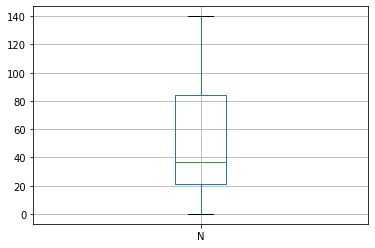

In [113]:
df.boxplot(column=['N'])

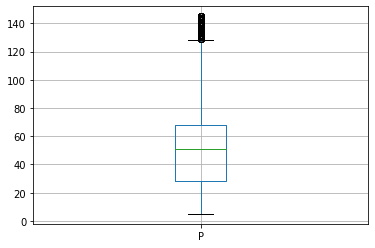

In [114]:
df.boxplot(column=['P'])

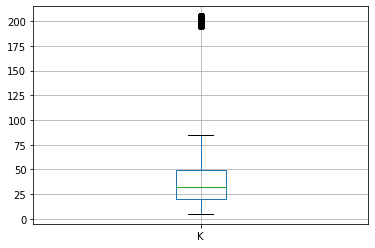

In [115]:
df.boxplot(column=['K'])

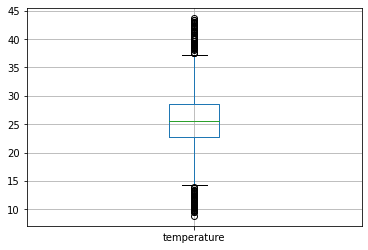

In [116]:
df.boxplot(column=['temperature'])

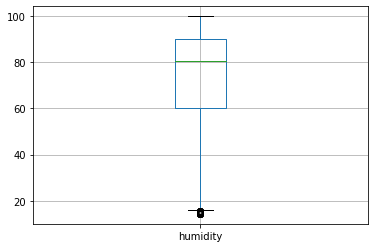

In [117]:
df.boxplot(column=['humidity'])

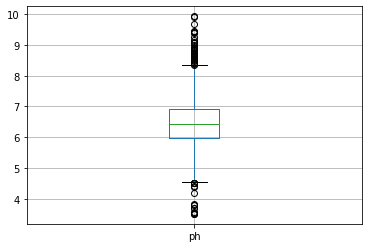

In [118]:
df.boxplot(column=['ph'])

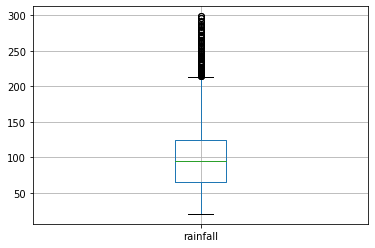

In [119]:
df.boxplot(column=['rainfall'])

## Visualisation

Histograms of bin size 10 has been used to visualize the spread and distribution of data.​


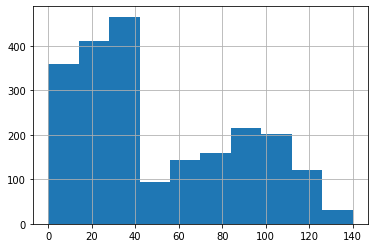

In [120]:
df['N'].hist(bins = 10)


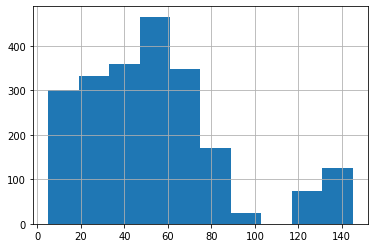

In [121]:
df['P'].hist(bins = 10)

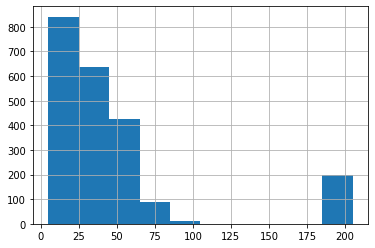

In [122]:
df['K'].hist(bins = 10)

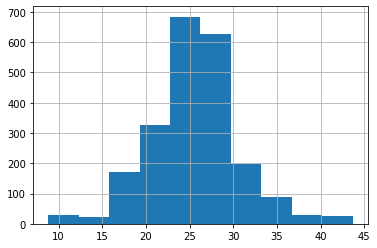

In [123]:
df['temperature'].hist(bins = 10)

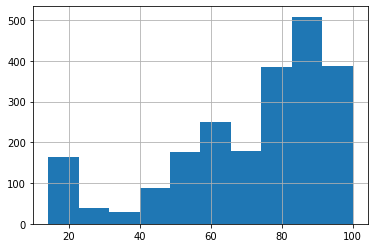

In [124]:
df['humidity'].hist(bins = 10)

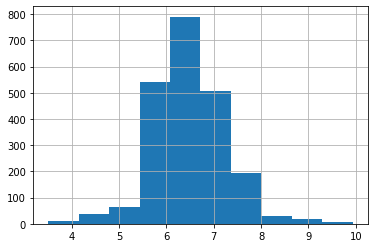

In [125]:
df['ph'].hist(bins = 10)

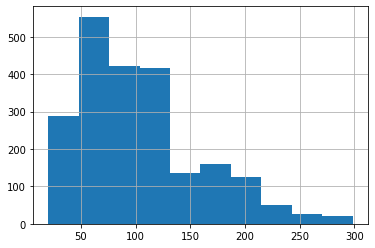

In [126]:
df['rainfall'].hist(bins = 10)

## Train Test Split

Datasets are split into two, Training data and Testing data. ​
The training data is used to train the model and the testing data is ​used to test and validate the model. The dataset is divided into two ​in ratio 80/20.

In [127]:
X = df.drop(['label'], axis = 1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [128]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [129]:
Y = df['label']
Y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)


# Training Models

## KNN

In [131]:
k = ceil(sqrt(len(X_train)) / 2) 
KNN_model = KNeighborsClassifier(n_neighbors = k)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [132]:
y_pred = KNN_model.predict(X_test)

In [133]:
KNN_score = KNN_model.score(X_test, y_test)
KNN_score

0.9227272727272727

In [134]:
KNN_precision = precision_score(y_test, y_pred, average = 'macro')
KNN_precision

0.9317610509896959

In [135]:
KNN_recall = recall_score(y_test, y_pred, average='macro')
KNN_recall

0.9263448961860593

In [136]:
KNN_f1 = f1_score(y_test,y_pred,average= 'macro')
KNN_f1

0.9192345410962066

In [137]:
KNN_confusion = confusion_matrix(y_test, y_pred)
print(KNN_confusion)

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  4  0  2 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

## Gaussian Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)
predicted_values = NaiveBayes.predict(X_test)

In [139]:
NaiveBayes.score(X_test, y_test)

0.9954545454545455

In [140]:
NaiveBayes_precision = precision_score(y_test, predicted_values, average = 'macro')
NaiveBayes_precision

0.9963636363636365

In [141]:
NaiveBayes_recall = recall_score(y_test, predicted_values, average='macro')
NaiveBayes_recall

0.9952153110047847

In [142]:
NaiveBayes_f1 = f1_score(y_test,predicted_values,average= 'macro')
NaiveBayes_f1

0.9955808080808081

In [143]:
NaiveBayes_confusion = confusion_matrix(y_test, predicted_values)
print(NaiveBayes_confusion)

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

## Decision tree

In [144]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [145]:
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [146]:
print("Classification Metrices : ")

print("Accuracy:",accuracy_score(y_test, y_pred))
dt_a = accuracy_score(y_test, y_pred)

print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
dt_f = f1_score(y_test, y_pred, average='weighted')

print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
dt_p = precision_score(y_test,y_pred, average='weighted')

print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
dt_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9795454545454545
F1 Score: 0.9794737642876267
Precision:  0.9800220588235293
Recall:  0.9795454545454545


Text(69.0, 0.5, 'Actual')

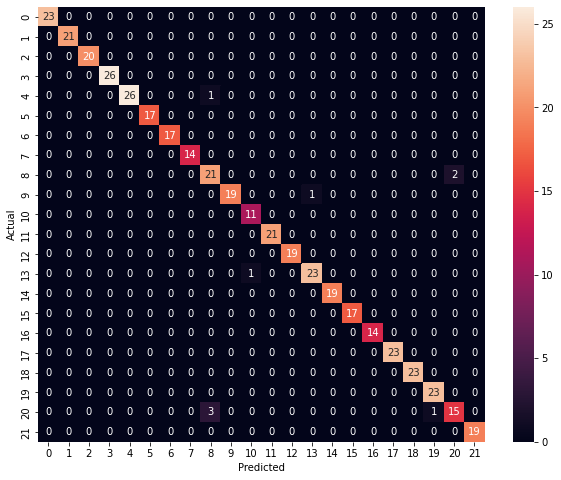

In [147]:
plt.figure(figsize=(10,8)) 
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted') 
plt.ylabel('Actual')

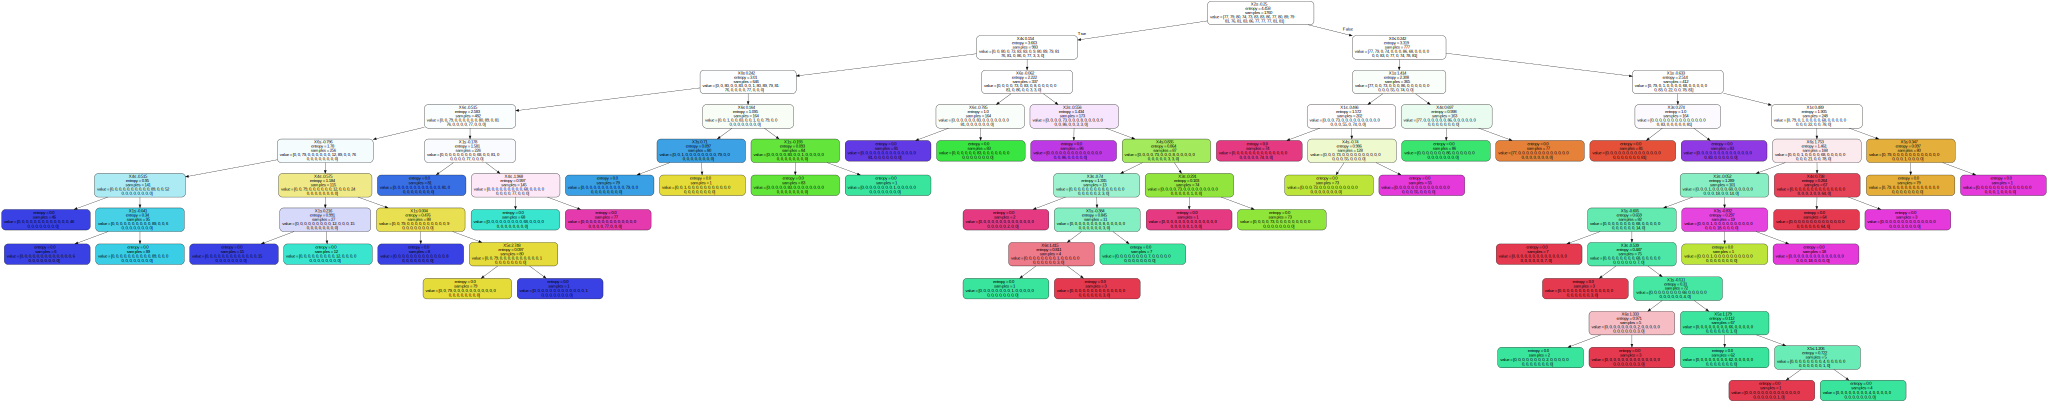

In [148]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, filled=True, rounded=True,special_characters=True,)
graph = graphviz.Source(dot_data,format="png") 
graph

## Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=100)
clf_rf.fit(X_train, y_train)
rf_predicted_values = clf_rf.predict(X_test)

In [150]:
print("Accuracy: {}".format(accuracy_score(y_test, rf_predicted_values)))
print("f1 score: {}".format(f1_score(y_test, rf_predicted_values, average='weighted')))
print("Precision score: {}".format(precision_score(y_test,rf_predicted_values, average='weighted')))
print("Recall score: {}".format(recall_score(y_test,rf_predicted_values,average = 'weighted')))
print(confusion_matrix(y_test,rf_predicted_values))

Accuracy: 0.9931818181818182
f1 score: 0.9931754816901672
Precision score: 0.9937348484848485
Recall score: 0.9931818181818182
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  

## Multi-Layer Perceptron

In [151]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,45,30,25,15,), random_state=1, max_iter=300, warm_start=True).fit(X_train, y_train)

In [152]:
mlp_predicted_values=mlp.predict(X_test)

In [153]:
print("Accuracy: {}".format(accuracy_score(y_test, mlp_predicted_values)))
print("f1 score: {}".format(f1_score(y_test, mlp_predicted_values, average='weighted')))
print("Precision score: {}".format(precision_score(y_test,mlp_predicted_values, average='weighted')))
print("Recall score: {}".format(recall_score(y_test,mlp_predicted_values,average = 'weighted')))
print(confusion_matrix(y_test,mlp_predicted_values))

Accuracy: 0.975
f1 score: 0.9754264311076949
Precision score: 0.9790055315055315
Recall score: 0.975
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [